In [1]:
import pandas as pd


In [2]:
import numpy as np


In [3]:

from sklearn.model_selection import train_test_split


In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
df = pd.read_csv('C:/Users/MARIA JARVIS/Downloads/auto-mpg.csv')  

In [11]:
print("First few rows of the DataFrame:")

First few rows of the DataFrame:


In [12]:
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [13]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [15]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [18]:
df = df.dropna().replace({chr(0xA0): ' '}, regex=True)  

In [19]:
X_local = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

In [20]:
y_local = df['mpg']
print("\nFirst few rows of the features (X) and target (y):")
print(X_local.head())
print(y_local.head())


First few rows of the features (X) and target (y):
   cylinders  displacement  horsepower  weight  acceleration  model year
0          8         307.0       130.0    3504          12.0          70
1          8         350.0       165.0    3693          11.5          70
2          8         318.0       150.0    3436          11.0          70
3          8         304.0       150.0    3433          12.0          70
4          8         302.0       140.0    3449          10.5          70
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_local, y_local, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.116173    0.00101347 -0.00227634 -0.00656101  0.06173551  0.76063644]
Intercept: -15.05775858528234


In [24]:
y_pred = model.predict(X_test)

In [27]:
print("/nPredicted values:",y_pred[:5])

/nPredicted values: [25.93279618 26.29927859 32.96548909 26.8544302  29.45372581]


In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [29]:
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 2.5038600897761296
Mean Squared Error (MSE): 10.502370329417335
Root Mean Squared Error (RMSE): 3.2407360783342627


In [30]:
import matplotlib.pyplot as plt

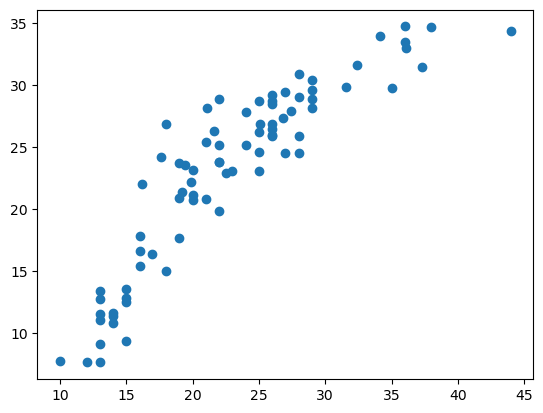

In [31]:
plt.scatter(y_test, y_pred)

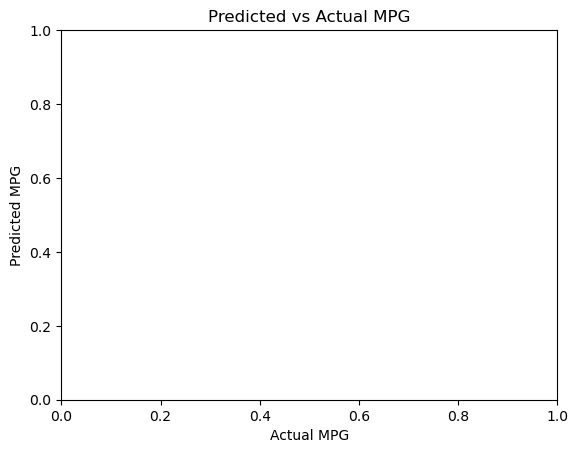

In [32]:
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Predicted vs Actual MPG")
plt.show()

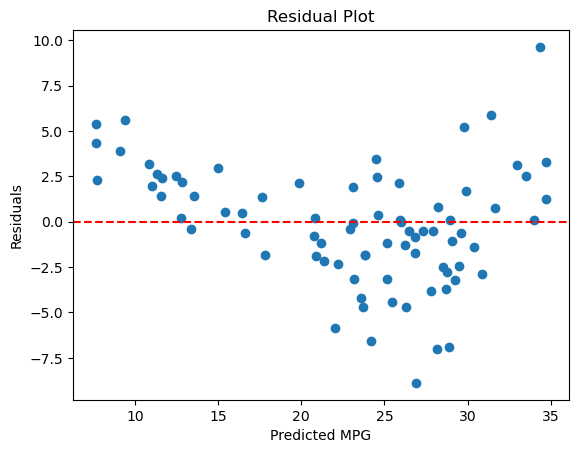

In [33]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()